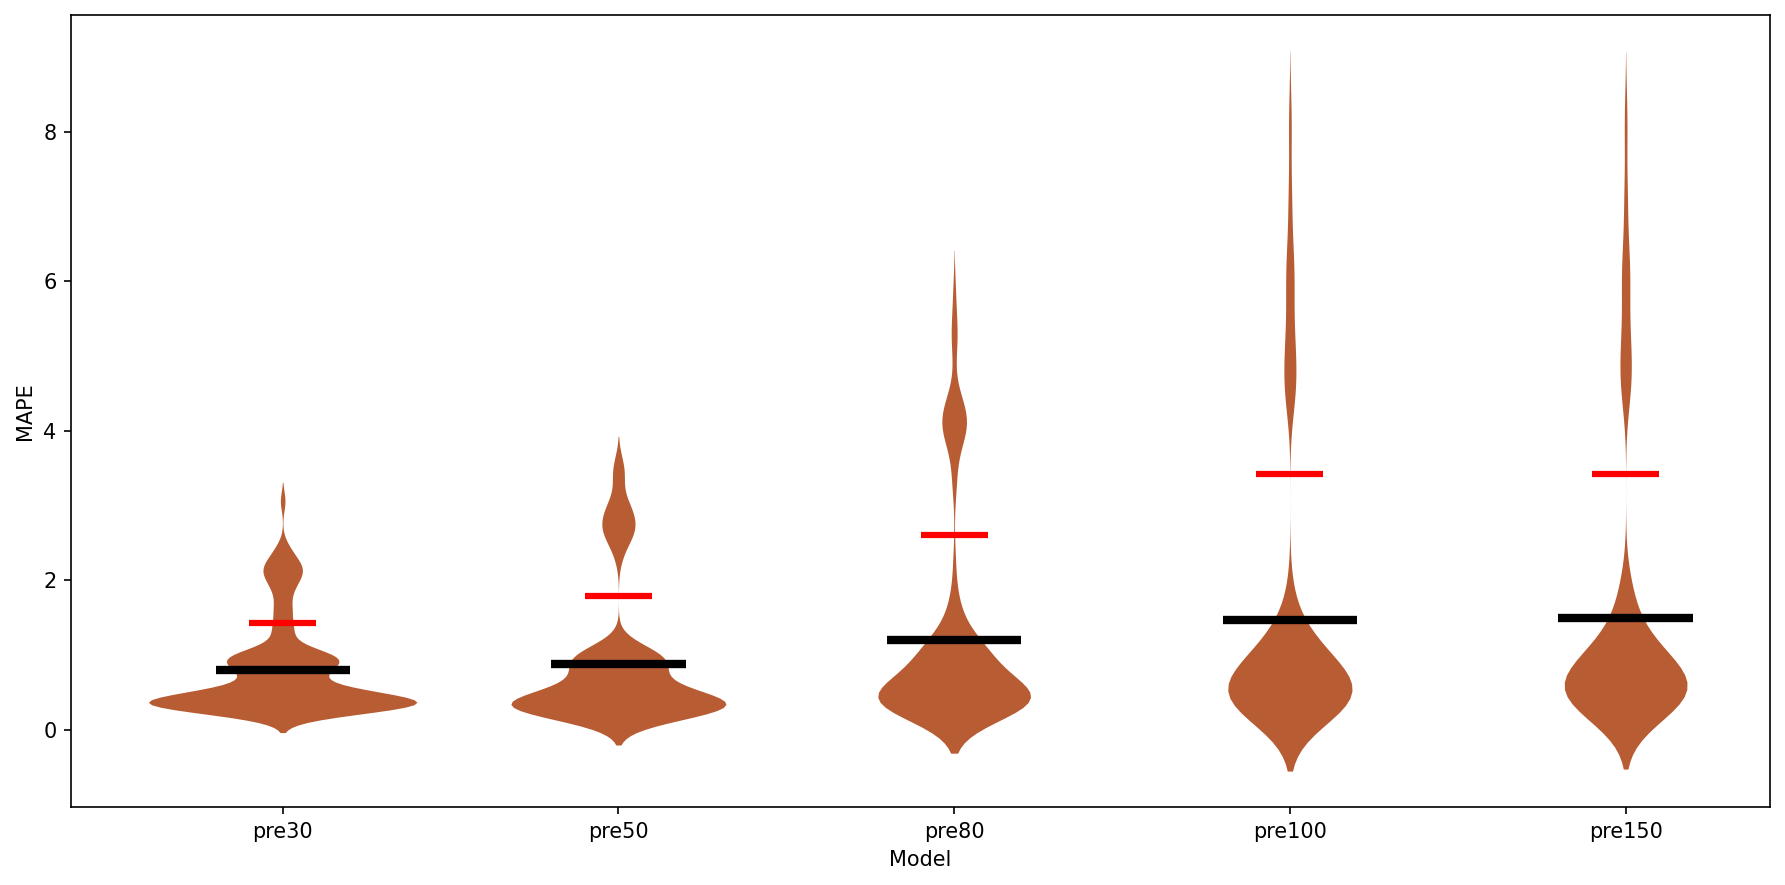

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def recreate_violin_plot_from_csv(csv_path, output_dir=None):
    try:
        df = pd.read_csv(csv_path)
        if df.empty:
            raise ValueError("error")
            
        required_cols = ['Model', 'Condition', 'MAPE']
        if not all(col in df.columns for col in required_cols):
            missing = [col for col in required_cols if col not in df.columns]
            raise ValueError(f"lack{missing}")
            
    except Exception as e:
        print(f"error")
        return None

    MODEL_ORDER = ["pre30", "pre50", "pre80", "pre100", "pre150"]
    valid_df = df.dropna(subset=['MAPE']).copy()
    valid_df['Model'] = pd.Categorical(valid_df['Model'], categories=MODEL_ORDER, ordered=True)
    
    plt.figure(figsize=(12, 6), dpi=150)
    VIOLIN_COLOR = '#CE541D'
    
    ax = sns.violinplot(
        data=valid_df,
        x='Model',
        y='MAPE',
        order=MODEL_ORDER,
        color=VIOLIN_COLOR,
        cut=2,
        inner=None,
        bw_method=0.2,
        linewidth=0
    )
    
    stats = valid_df.groupby('Model', observed=True)['MAPE'].agg(['mean', 'std']).reset_index()
    
    for i, model in enumerate(MODEL_ORDER):
        if model not in stats['Model'].values:
            continue
            
        model_stats = stats[stats['Model'] == model].iloc[0]
        mean = model_stats['mean']
        std = model_stats['std']
        
        ax.hlines(
            y=mean,
            xmin=i-0.2,
            xmax=i+0.2,
            colors='black',
            linewidths=4,
            linestyles='-',
            alpha=1
        )
        
        ax.hlines(
            y=mean + std,
            xmin=i-0.1,
            xmax=i+0.1,
            colors='red',
            linewidths=3,
            linestyles='-',
            alpha=1
        )
    
    # plt.ylim(0, 10)
    # ax.set(xticklabels=[], yticklabels=[])
    # ax.set_xlabel('')
    # ax.set_ylabel('')
    # ax.set_title('')
    # ax.grid(False)
    
    # for spine in ax.spines.values():
    #     spine.set_visible(False)
    
    plt.tight_layout()
    
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        img_path = os.path.join(output_dir, 'violin_plot_recreated.png')
        plt.savefig(img_path, bbox_inches='tight', dpi=300)
    
    plt.show()
    
    
    return ax

if __name__ == "__main__":
    CSV_PATH = r"D:\Gitload\PIMOE\Fig 5d\fig5d.csv"

    recreate_violin_plot_from_csv(CSV_PATH)